# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [1]:
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
print("Accuray scores mean: ", np.mean(scores))

[0.96666667 1.         0.86666667 0.86666667 1.        ]
Accuray scores mean:  0.9400000000000001


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [2]:
from sklearn import neighbors

n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
# uniform ==  ogni vicino da un equo contributo alla predizione del datapoit
# distance == ogni vicino da un contributo pari alla sua distanza dal datapoit. I punti più vicini influenzano di più il processo decisionale. 
# se il dataset è uniforme conviene uniform, se invece ha desità variabile conviene distance 

clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print("Classification score of k-nn with uniform weighting")
print("Cross validation average accuracy score: ", np.mean(scores))
print()

# shows the model predictions  
number_ok = 0
number_fail = 0

for i in range(len(iris.target)):
    #print(f"Datapoint {i}: ", iris.data[i,:])
    instance = iris.data[i,:].reshape(1,-1)
    predicted = clf_knn.predict(instance)[0]
    
    #print(f"Reshape in (1,-1) {i}: ", instance) 
    #print(f"Knn prediction on datapoint {i}: ", predicted)
    
    if iris.target[i] == predicted:
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        number_ok += 1
    else:
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
        number_fail += 1
    
print("Number ok: ", number_ok)
print("Number fail: ", number_fail)

Classification score of k-nn with uniform weighting
Cross validation average accuracy score:  0.9800000000000001

Number ok:  146
Number fail:  4


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [3]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

number_ok = 0
number_fail = 0
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        number_ok += 1
    else:
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted2]))
        number_fail += 1
    
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print("Cross validation average accuracy score: ", np.mean(scores2))
print()

print("Number ok: ", number_ok)
print("Number fail: ", number_fail)

Classification score of k-nn with distance weighting
Cross validation average accuracy score:  0.9866666666666667

Number ok:  150
Number fail:  0


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

best k=7
best accuracy=0.9666666666666667


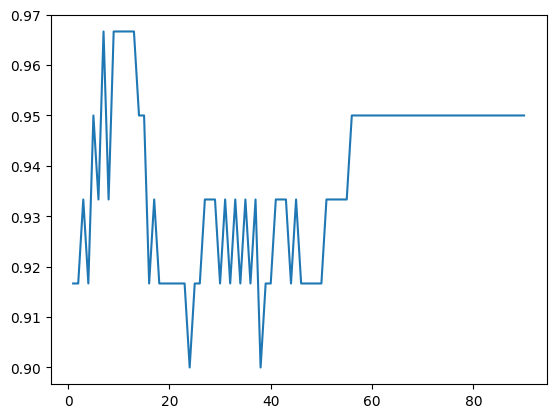

In [4]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy = 0
best_k = 1
A = np.zeros(len(y_train), dtype=float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf_knn3.fit(X_train, y_train)
    index = n_neighbors-1
    A[index] = clf_knn3.score(X_test, y_test)
    
    if best_accuracy < clf_knn3.score(X_test, y_test):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k = n_neighbors
        
    #print("k neighbors="+str(n_neighbors))
    #print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))


import matplotlib.pyplot as plt
plt.yticks(np.arange(0.0,1.0,0.01))
plt.plot(np.arange(1,len(y_train)+1),A)
plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting: uniform
best k = 7
best accuracy = 0.9666666666666667

weighting: distance
best k = 7
best accuracy = 0.9666666666666667



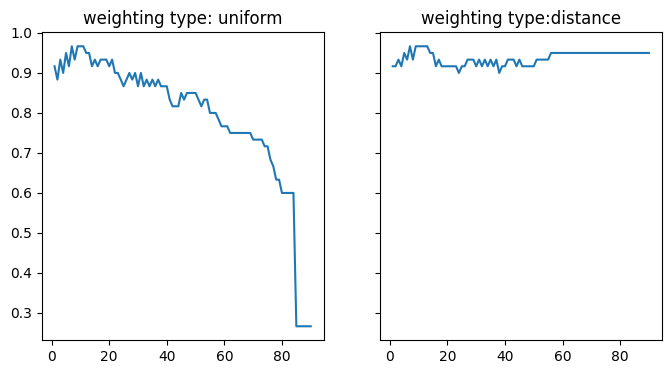

In [5]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  # parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (8,4))
for weight_type in ['uniform','distance']:
    print("weighting: "+str(weight_type))
    A=np.zeros(len(y_train), dtype=float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("best k = "+str(best_k))
    print("best accuracy = "+str(best_accuracy))
    print()
    
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type: ' + str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()

In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)


weighting: uniform
best k = 7
best accuracy = 0.9666666666666667

weighting: distance
best k = 7
best accuracy = 0.9666666666666667


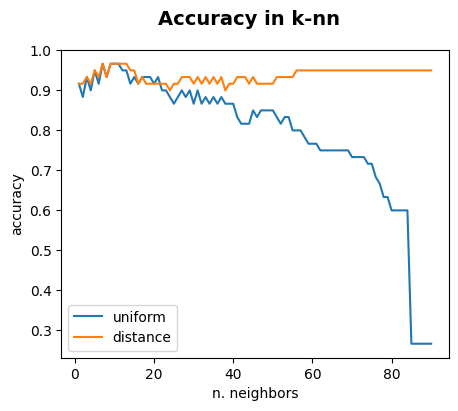

In [6]:
import numpy as np
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure(figsize=(5,4))
fig.suptitle('Accuracy in k-nn', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\nweighting: "+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    #print("\n")
    print("best k = "+str(best_k))
    print("best accuracy = "+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
    
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


# Traccia Esercizio 2

1) mostrare lo scatter plot (in 2D, scegliendo 2 delle 4 features) dei dati di Iris, con un colore determinato dalla classe (colore rosso per Setosa, blu per Versicolor, verde per Virginica). Quale sono secondo voi le 2 feature migliori da usare?
2) mostrare uno scatter plot simile, ma ora il colore dei punti e` determinato dalla classe stimata da k-nn, con un valore scelto di k a vostra scelta.
3) Visualizzate il ROC plot del migliore albero di decisione che avete addestrato nell'esercizio n.1 
4) Confrontare gli alberi decisione e k-nn sullo spazio ROC: per quali valori di (TPR,FPR) k-nn e` meglio degli alberi di decisione?
5) Eseguite k-nn ma ora usate come funzione di distanza una funzione: 
- distance(x,y)= 1- k(x,y) 
- dove k(x,y) e` un Kernel Gaussian-like  k(x,y) (per k(x,y) usate la Radial Basis Function con il parametro Gamma  = 1/sigma^2) che controlla la sua ampiezza.

Il parametro gamma deve essere aggiustato (tuned) al valore ottimale, a secondo dell'accuratezza del k-nn (in modo simile a quanto abbiamo fatto precedentemente per il parametro n_neighbors). In questo caso, scegliete un valore di k=7.

Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


# Carica il dataset Iris

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
dataset = pd.concat([data, target], axis = 1)

dataset.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Check correlazioni
- usando la correlazione di pearson si valuta la correlazione per ogni coppia di features
- si selgono le features che hanno un'alta correlazione positiva fra di loro e verso i valori target (0,1,2)
- si visualizza il grafico delle correlazioni usando la funzione "corr" di pandas

<Axes: >

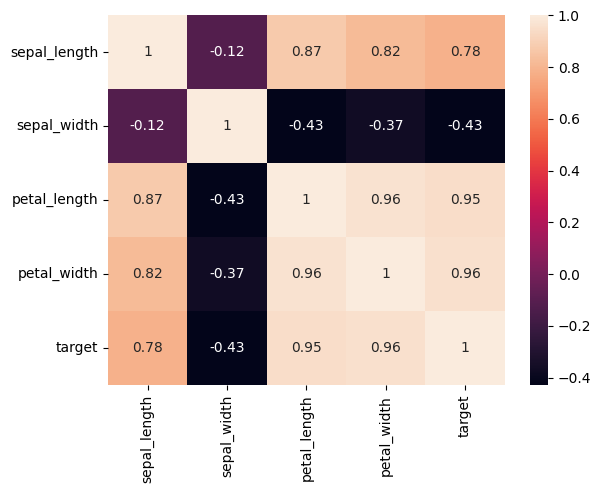

In [13]:
import seaborn as sns

sns.heatmap(dataset.corr(method='pearson'), annot = True)

Dal grafico si osserva che le features più correlate sono petal length e petal width



### mostrare lo scatter plot (in 2D, scegliendo 2 delle 4 features) dei dati di Iris, 

con un colore determinato dalla classe (colore rosso per Setosa, blu per Versicolor, verde per Virginica). Quale sono secondo voi le 2 feature migliori da usare?



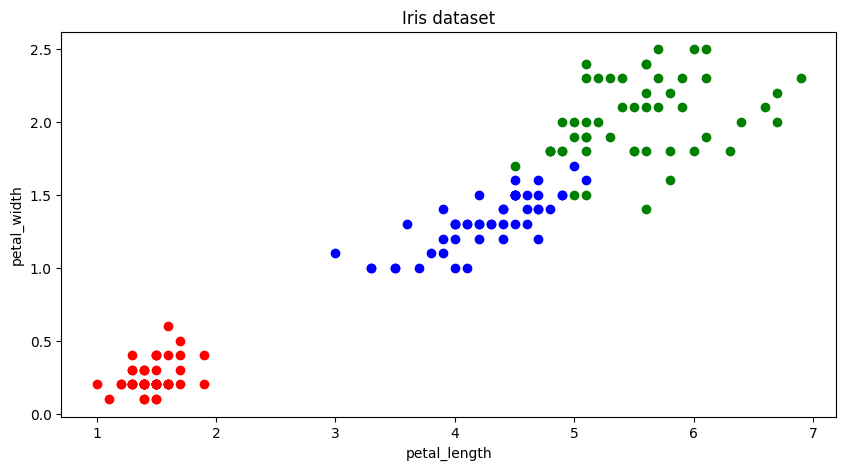

In [14]:
plt.figure(figsize=(10,5))
plt.title('Iris dataset')

color = ['red', 'blue', 'green']
plt.xlabel('petal_length')
plt.ylabel('petal_width')

for i in range(len(iris.data)):
    plt.scatter(x= iris.data[i, 2],y=iris.data[i, 3], color=color[iris.target[i]])

### mostrare uno scatter plot simile, 
ma ora il colore dei punti e` determinato dalla classe stimata da k-nn, con un valore scelto di k a vostra scelta.

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

def display_ROC_curve(y_test, y_pred, target_names, sizeX, sizeY):
    """
    Display ROC curve
    :param y_test: 
    :param y_pred: 
    :param target_names: 
    :return: 
    """
    figure, axis = plt.subplots(1, 3, figsize=(sizeX, sizeY)) 
    colors = ['tab:red', 'tab:blue', 'tab:green']
    for i,label in enumerate(target_names):
        
        fpr, tpr, _ = roc_curve(np.where(y_test==i, 1, -1), np.where(y_pred==i, 1, -1))
        axis[i].plot(fpr, tpr)
        axis[i].set_title(f'Model: {i} | ROC curve {target_names[i]} VS others')
        roc_auc = metrics.auc(fpr, tpr)
        
        axis[i].plot(fpr,tpr, colors[i], label="Roc AUC: " + str(round(roc_auc,3))) 
        axis[i].legend(loc="upper right")
        axis[i].set_title("ROC curve assuming positive class: " + label) 
        #display.plot()
    
    for ax in axis.flat: ax.set(xlabel='False Positive rate', ylabel='True Positive rate')
    plt.show()



Cross validation accuracy scores: 
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean:  0.9800000000000001


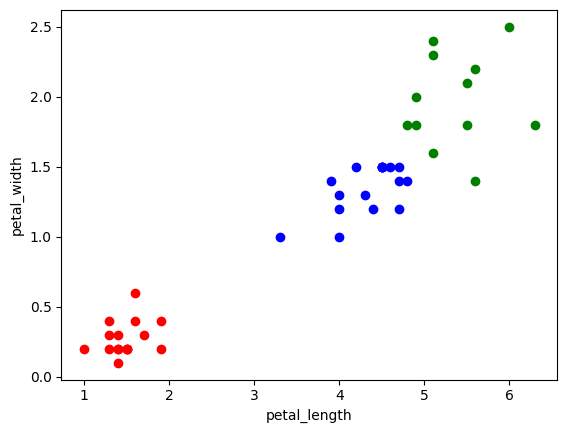

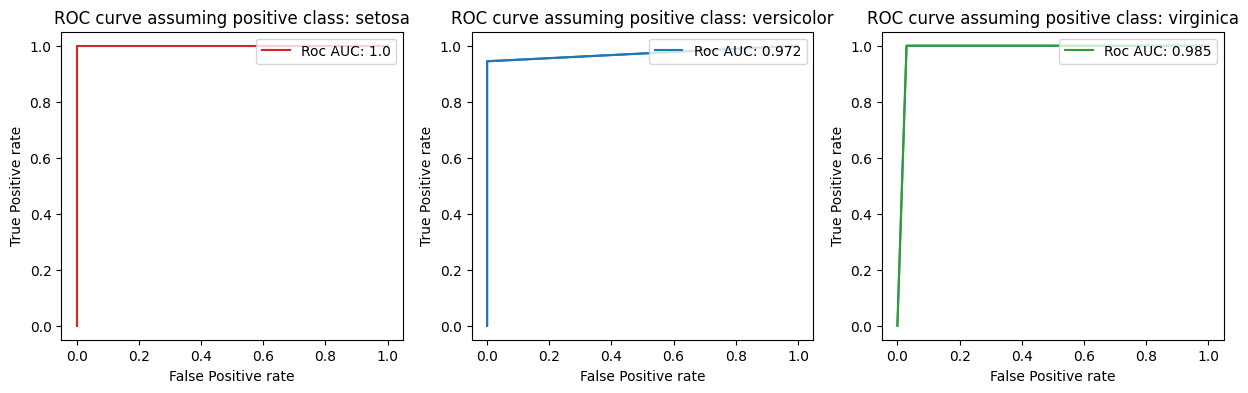

In [41]:
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
n_neighbors = 7 # abbiamo visto sopra che per questo dataset è il valore migliore
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy


clf_knn = clf_knn.fit(X_train, y_train) 
predicted_y_test =clf_knn.predict(X_test)

print("Cross validation accuracy scores: ")
print(scores)
print("Mean: ", np.mean(scores))

color = ['red', 'blue', 'green']
plt.xlabel('petal_length')
plt.ylabel('petal_width')
for i_example in range(len(X_test)):
    plt.scatter(x= X_test[i_example, 2],y=X_test[i_example, 3], color=color[predicted_y_test[i_example]])



display_ROC_curve(y_test, predicted_y_test, iris.target_names, 15,4)


### Visualizzate il ROC plot del migliore albero di decisione che avete addestrato nell'esercizio n.1 

3) Visualizzate il ROC plot del migliore albero di decisione che avete addestrato nell'esercizio n.1 
4) Confrontare gli alberi decisione e k-nn sullo spazio ROC: per quali valori di (TPR,FPR) k-nn e` meglio degli alberi di decisione?


Cross validation accuracy scores: 
[0.93333333 0.96666667 0.9        0.86666667 1.        ]
Mean:  0.9333333333333332


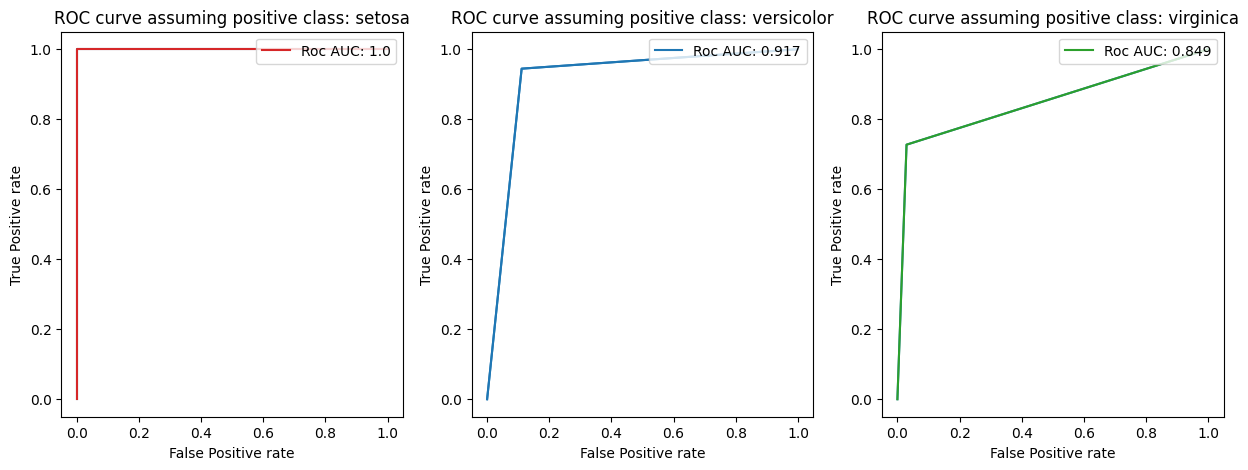

In [49]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  min_samples_leaf=10,
                                  random_state=300,
                                  max_depth=10,
                                  min_samples_split=25,
                                  class_weight={0:1,1:1,2:1})

scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
clf = clf.fit(X_train, y_train)
predicted_y_test = clf.predict(X_test)

print("Cross validation accuracy scores: ")
print(scores)
print("Mean: ", np.mean(scores))


display_ROC_curve(y_test, predicted_y_test, iris.target_names, 15,5)


### Eseguite k-nn ma ora usate come funzione di distanza una funzione: 
- distance(x,y)= 1- k(x,y) 
- dove k(x,y) e` un Kernel Gaussian-like  k(x,y) (per k(x,y) usate la Radial Basis Function con il parametro Gamma  = 1/sigma^2) che controlla la sua ampiezza.

Il parametro gamma deve essere aggiustato (tuned) al valore ottimale, a secondo dell'accuratezza del k-nn (in modo simile a quanto abbiamo fatto precedentemente per il parametro n_neighbors). In questo caso, scegliete un valore di k=7.



best gamma=4
best accuracy=0.9666666666666667


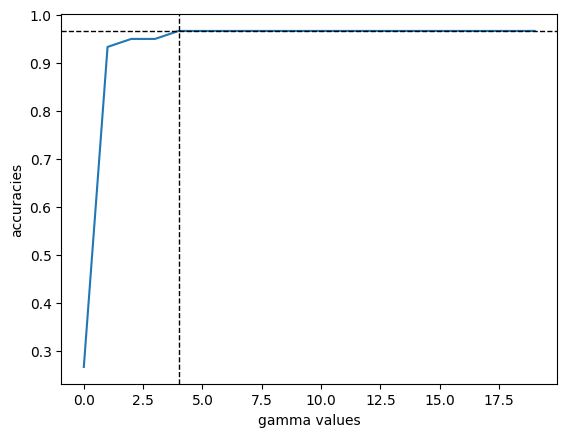

In [53]:
from sklearn.metrics.pairwise import rbf_kernel


# Commento sul kernel RBF
# - E' stata definita una funzione wrapper "distance" che invoca la funzione kernel
#
# - La funzione kernel quale calcola un kernel RBF avendo in input
#   - vettore x
#   - vettore y
#   - un valore gamma = 1/ 2*sigma^2 -------> di default si assume un valore gamma = 1 / num_features_x

# il parametro gamma controlla l'ampiezza della curva radiale del kernel.


def kernel(x, y, gamma):
    
    # invoco rbf_kernel normalizzando i valori dei vettori nell'intervallo -1 - 1
    rbf = rbf_kernel(np.array(x).reshape(1, -1), np.array(y).reshape(1, -1), gamma=gamma)
    return rbf[0, 0]


def distance(x, y, **kwargs):
    g = kwargs["gamma"]
    return 1 - kernel(x, y, g)


iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

n_neighbors = 7 # k
best_accuracy = 0
best_gamma = 0

accuracies = []  # for storing accuracies
for gamma in np.arange(0, 20):
    my_clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance', metric=distance, metric_params={"gamma": gamma})
    my_clf_knn.fit(X_train, y_train)
    acc = my_clf_knn.score(X_test, y_test)
    accuracies.append(acc)

    if best_accuracy < acc:
        best_accuracy = acc
        best_gamma = gamma

print("\n")
print(f'best gamma={best_gamma}')
print(f'best accuracy={best_accuracy}')

plt.plot(np.arange(0, 20), accuracies)
plt.ylabel("accuracies")
plt.xlabel(f"gamma values")
plt.axhline(y=best_accuracy, linewidth=1, linestyle='dashed', color='k')
plt.axvline(x=best_gamma, linewidth=1, linestyle='dashed', color='k')
plt.show()